# Explore here

In [50]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


archivo = " https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"

df = pd.read_csv(archivo)

print(df)











      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [51]:
#Primeros valores
df.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
#Info de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age. Edad del beneficiario principal (numérico)
sex. Género del beneficiario principal (categórico)
bmi. índice de masa corporal (numérico)
children. Número de niños/dependientes cubiertos por un seguro médico (numérico)
smoker. ¿Es fumador? (categórico)
region. Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)
charges. Prima del seguro médico (numérico)

In [53]:
#Duplicados
duplicados = df.duplicated()
num_duplicados = duplicados.sum()

print(num_duplicados)


1


In [54]:
#Eliminar duplicados
df_sin_duplicados = df.drop_duplicates()

In [56]:
#Análisis univariante
#Sexo
df_sin_duplicados.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [57]:
#Fumador?
df_sin_duplicados.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [58]:
#Región
df_sin_duplicados.region.value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

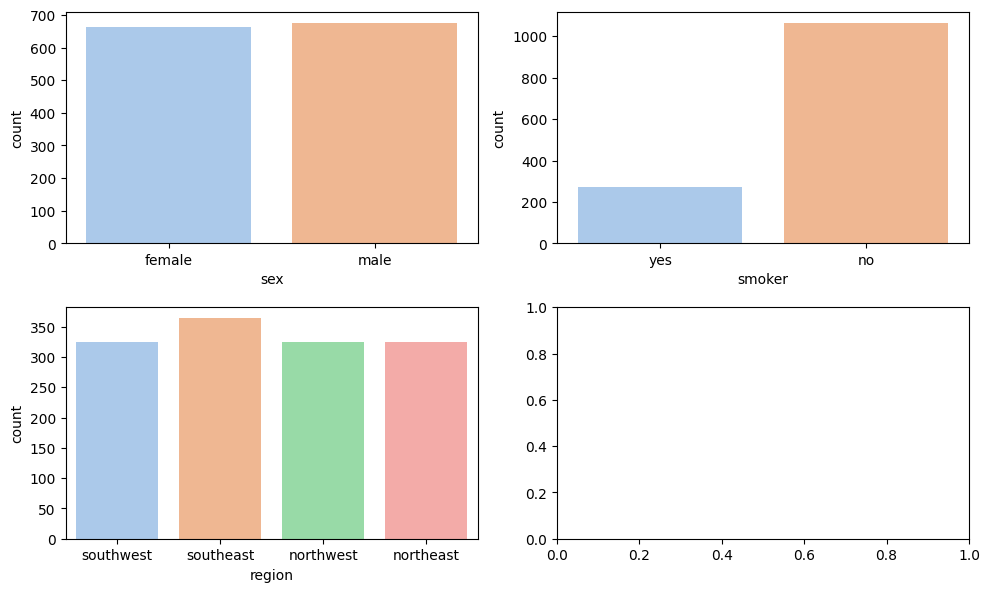

In [59]:
fig, axis = plt.subplots(2, 2, figsize = (10, 6))

sns.countplot(ax = axis[0, 0], data = df_sin_duplicados, x = "sex", palette='pastel', hue= "sex", legend=False)
sns.countplot(ax = axis[0, 1], data = df_sin_duplicados, x = "smoker", palette='pastel', hue= "smoker", legend=False)
sns.countplot(ax = axis[1, 0], data = df_sin_duplicados, x = "region", palette='pastel', hue= "region", legend=False)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Muy repartido a nivel género, del mismo modo que esta muy repartido a nivel region. La gran mayoría no fumadores

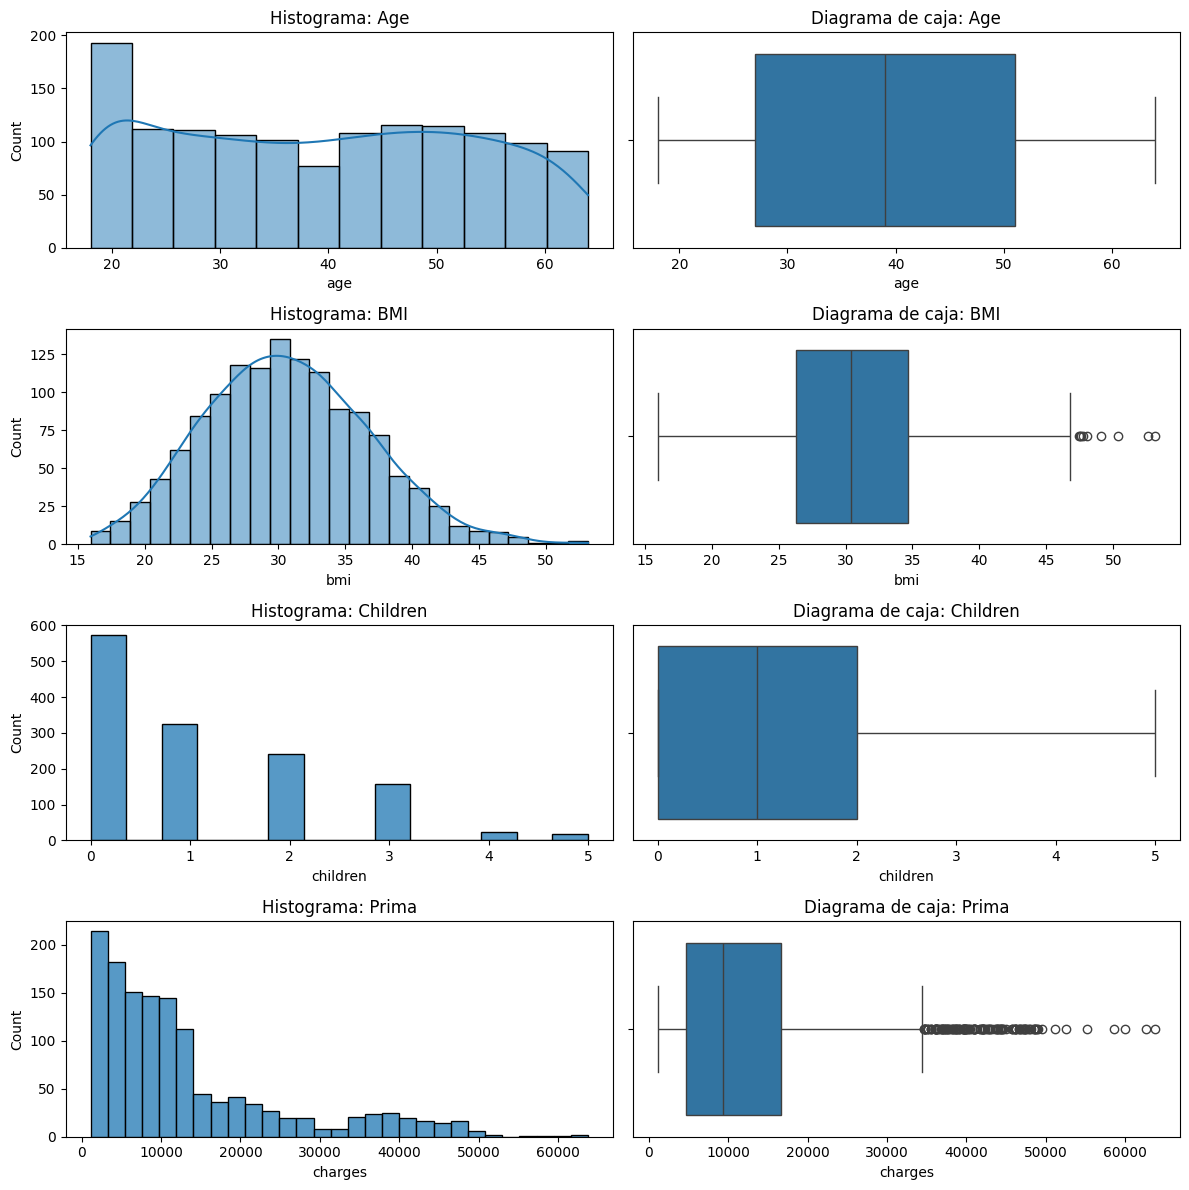

In [60]:
# Crear figura con 3 filas y 2 columnas
fig, axis = plt.subplots(4, 2, figsize=(12, 12))

# Variable "age"
sns.histplot(ax=axis[0, 0], data=df_sin_duplicados, x="age", kde=True).set(title="Histograma: Age")
sns.boxplot(ax=axis[0, 1], data=df_sin_duplicados, x="age").set(title="Diagrama de caja: Age")

# Variable "bmi"
sns.histplot(ax=axis[1, 0], data=df_sin_duplicados, x="bmi", kde=True).set(title="Histograma: BMI")
sns.boxplot(ax=axis[1, 1], data=df_sin_duplicados, x="bmi").set(title="Diagrama de caja: BMI")

# Variable "children"
sns.histplot(ax=axis[2, 0], data=df_sin_duplicados, x="children", kde=False).set(title="Histograma: Children")
sns.boxplot(ax=axis[2, 1], data=df_sin_duplicados, x="children").set(title="Diagrama de caja: Children")

# Variable "prima"
sns.histplot(ax=axis[3, 0], data=df_sin_duplicados, x="charges", kde=False).set(title="Histograma: Prima")
sns.boxplot(ax=axis[3, 1], data=df_sin_duplicados, x="charges").set(title="Diagrama de caja: Prima")


# Ajustar el diseño
plt.tight_layout()

# Mostrar gráficos
plt.show()

Atención a los valores de bmi que se salen demasiado por arriba
En cuanto a la prima, hay mucho valores que se salen del maximo(atento a este dato que es fundamental para predecir)



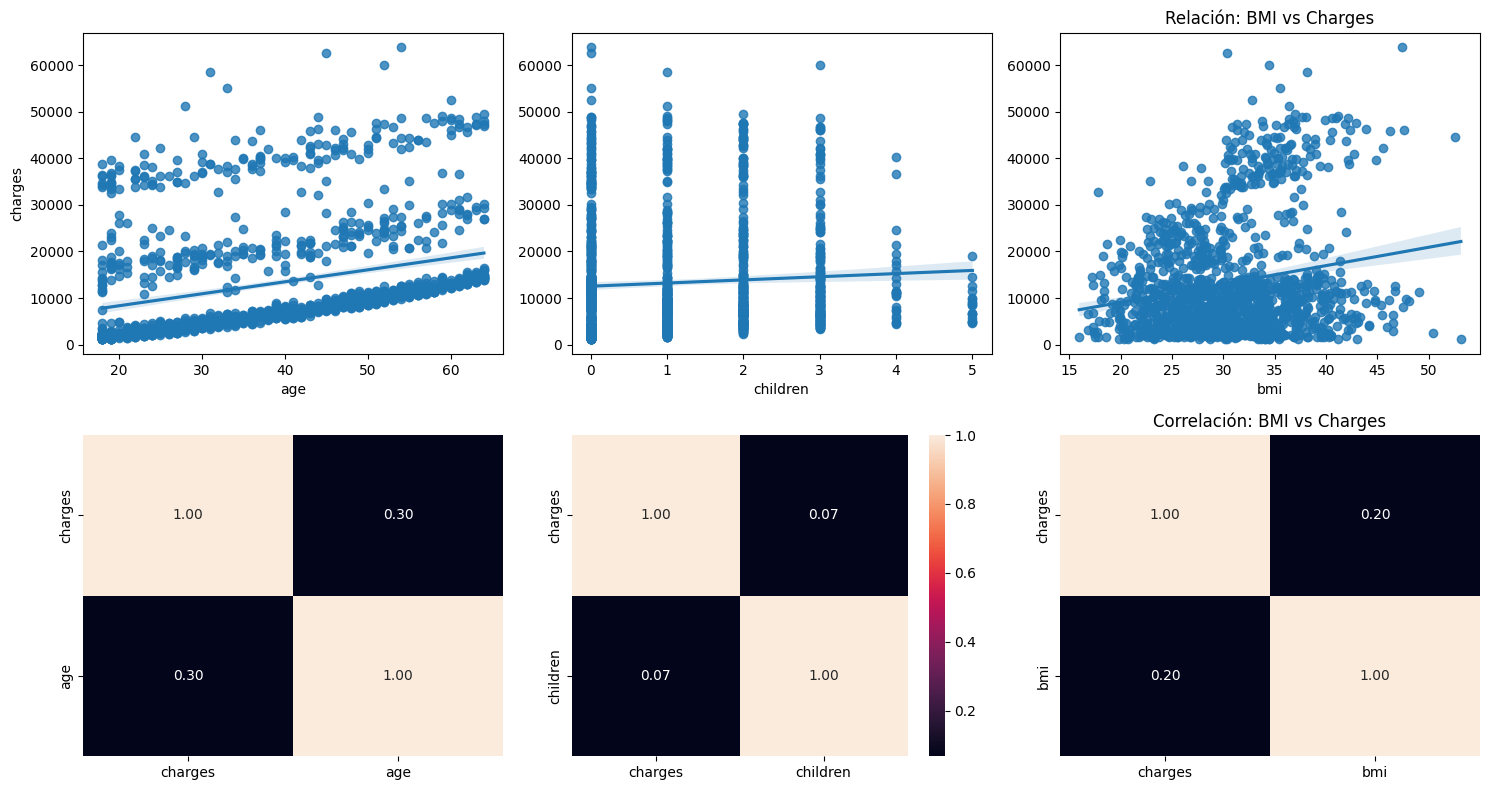

In [61]:
#Análisis multivariante

fig, axis = plt.subplots(2, 3, figsize = (15, 8))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df_sin_duplicados, x = "age", y = "charges")
sns.heatmap(df_sin_duplicados[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df_sin_duplicados, x = "children", y = "charges").set(ylabel=None)
sns.heatmap(df_sin_duplicados[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])


sns.regplot(ax=axis[0, 2], data=df_sin_duplicados, x="bmi", y="charges").set(title="Relación: BMI vs Charges", ylabel=None)
sns.heatmap(df_sin_duplicados[["charges", "bmi"]].corr(), annot=True, fmt=".2f", ax=axis[1, 2], cbar=False).set(title="Correlación: BMI vs Charges")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()



In [64]:
df_sin_duplicados["sex_n"] = pd.factorize(df_sin_duplicados["sex"])[0]
df_sin_duplicados["smoker_n"] = pd.factorize(df_sin_duplicados["smoker"])[0]
df_sin_duplicados["region_n"] = pd.factorize(df_sin_duplicados["region"])[0]


/tmp/ipykernel_2622/2393617130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_duplicados["sex_n"] = pd.factorize(df_sin_duplicados["sex"])[0]
/tmp/ipykernel_2622/2393617130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_duplicados["smoker_n"] = pd.factorize(df_sin_duplicados["smoker"])[0]
/tmp/ipykernel_2622/2393617130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

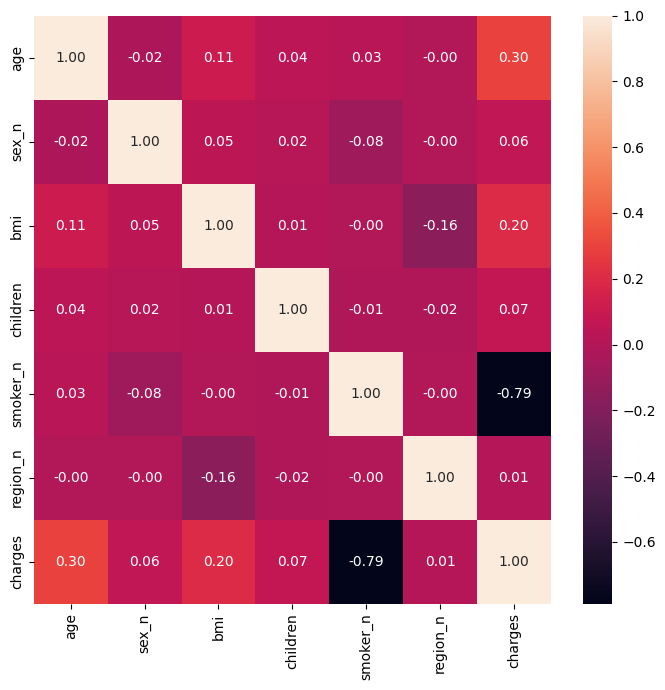

In [65]:
fig, axis = plt.subplots(figsize = (7, 7))

sns.heatmap(df_sin_duplicados[["age", "sex_n", "bmi", "children", "smoker_n", "region_n", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

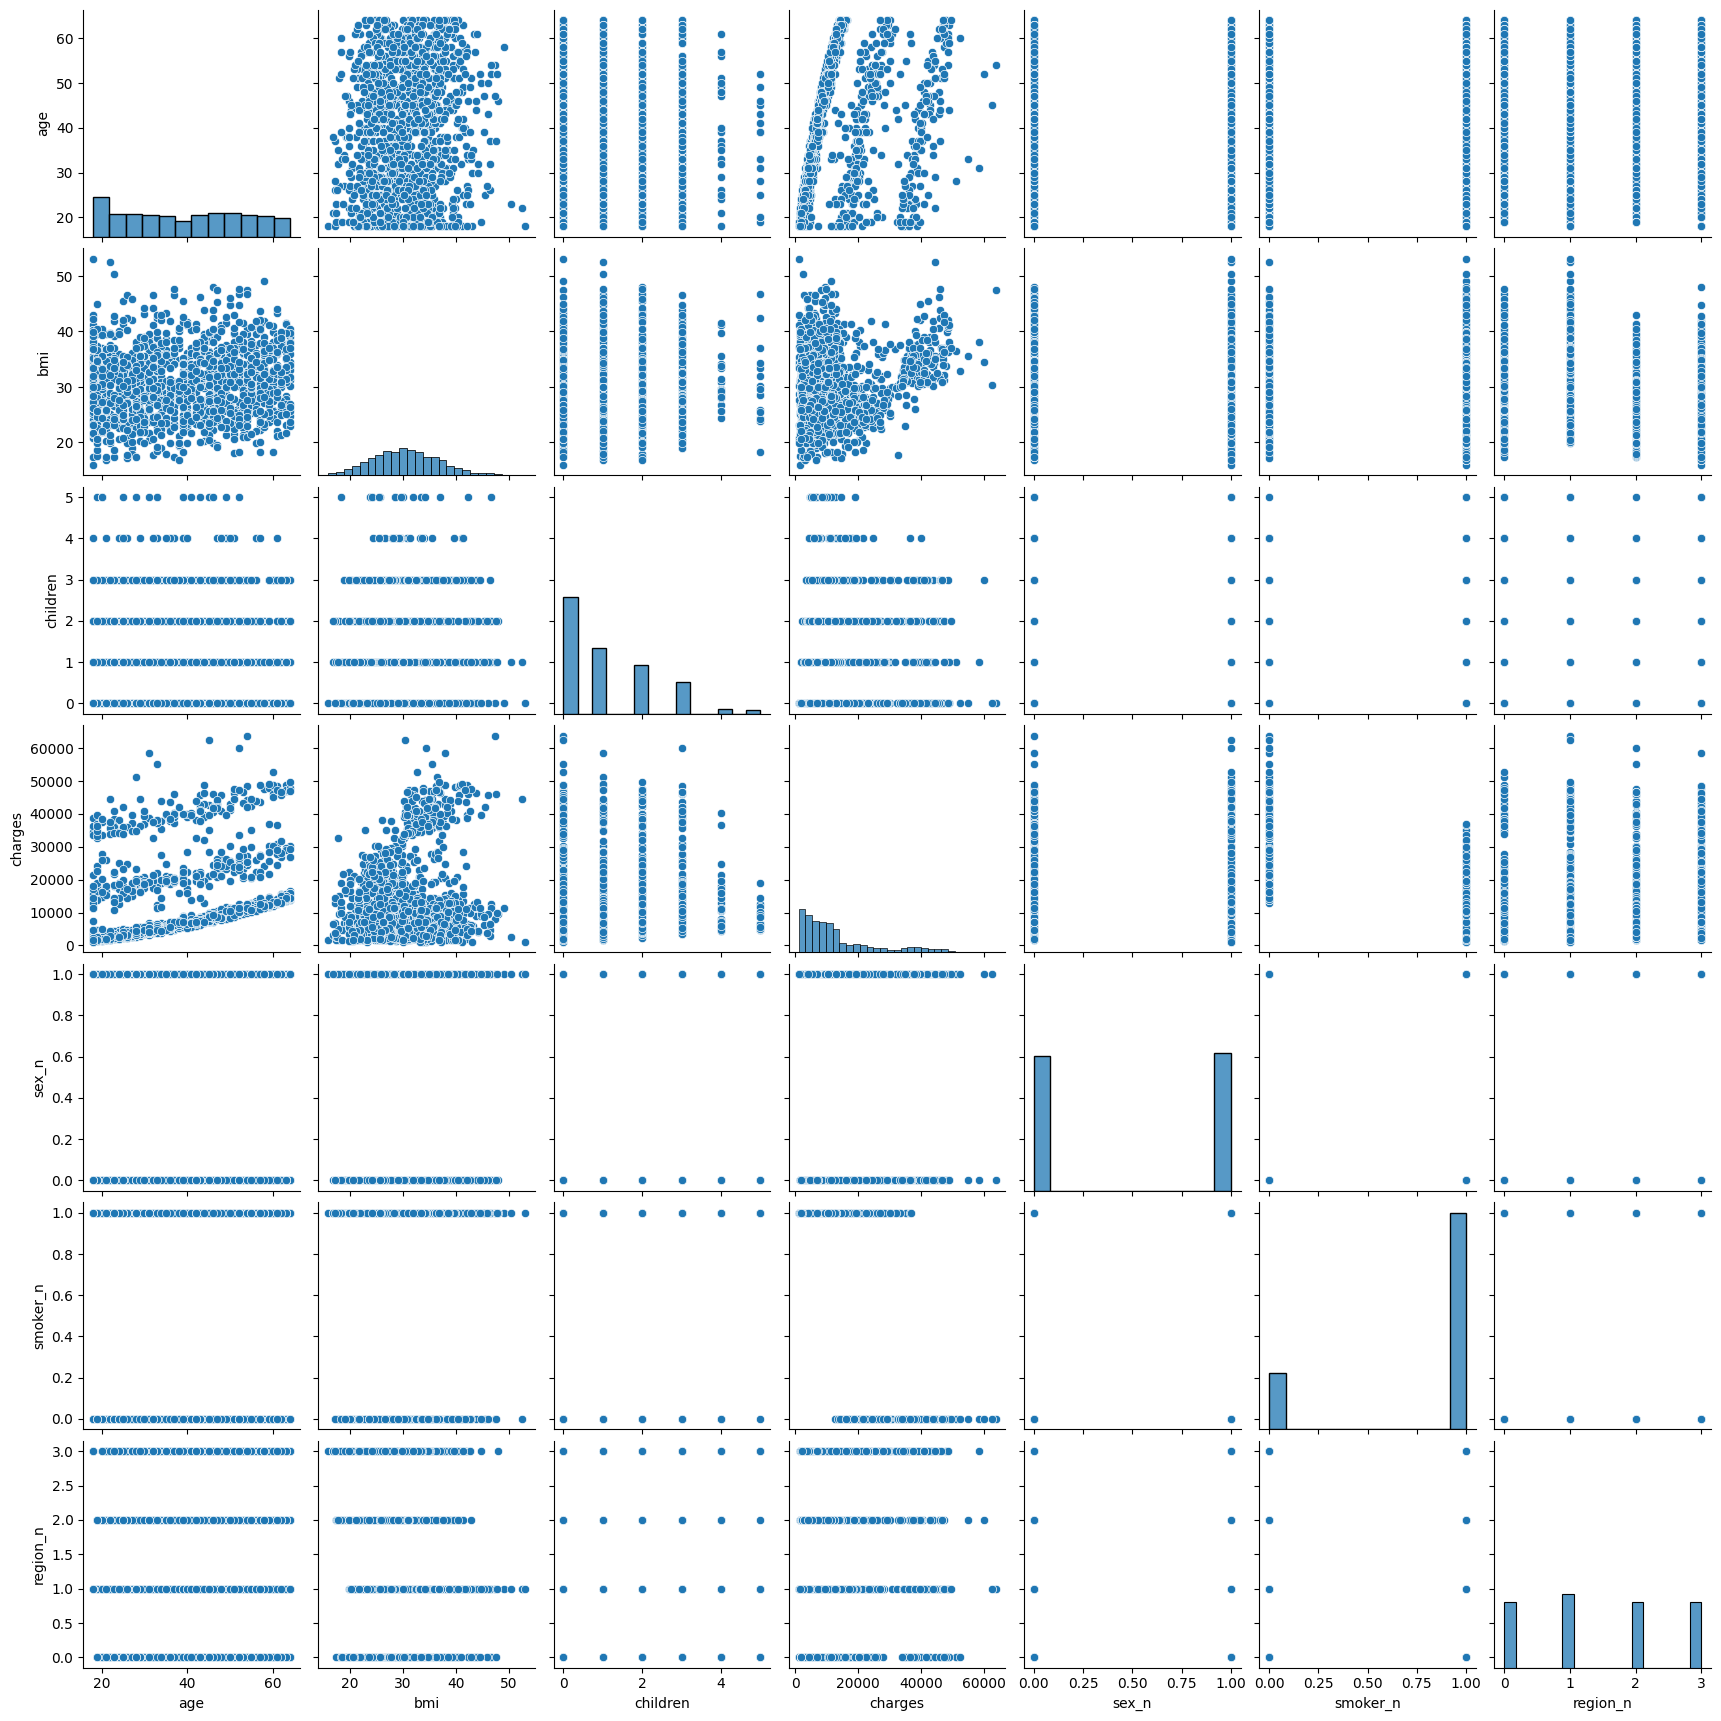

In [66]:
# relaciones todos con todos
sns.pairplot(data = df_sin_duplicados)

In [70]:
columns_to_drop = ['sex', 'smoker', 'region']

df_sin_duplicados = df_sin_duplicados.drop(columns=columns_to_drop, errors='ignore')


print(df_sin_duplicados)


      age     bmi  children      charges  sex_n  smoker_n  region_n
0      19  27.900         0  16884.92400      0         0         0
1      18  33.770         1   1725.55230      1         1         1
2      28  33.000         3   4449.46200      1         1         1
3      33  22.705         0  21984.47061      1         1         2
4      32  28.880         0   3866.85520      1         1         2
...   ...     ...       ...          ...    ...       ...       ...
1333   50  30.970         3  10600.54830      1         1         2
1334   18  31.920         0   2205.98080      0         1         3
1335   18  36.850         0   1629.83350      0         1         1
1336   21  25.800         0   2007.94500      0         1         0
1337   61  29.070         0  29141.36030      0         0         2

[1337 rows x 7 columns]


In [71]:
# Feature selection

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = df_sin_duplicados.drop("charges", axis = 1)
y = df_sin_duplicados["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,age,bmi,children,smoker_n
0,23.0,24.510,0.0,1.0
1,21.0,25.745,2.0,1.0
2,52.0,37.525,2.0,1.0
3,63.0,41.470,0.0,1.0
4,47.0,26.600,2.0,1.0


In [74]:
X_train = df_sin_duplicados.drop(["charges"], axis = 1)
y_train = df_sin_duplicados["charges"]
X_test = df_sin_duplicados.drop(["charges"], axis = 1)
y_test = df_sin_duplicados["charges"]

In [75]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [76]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): 10945.668004973355
Coefficients (b1, b2): [   257.20319637    332.59571503    478.77165047   -129.40086662
 -23819.1501015     354.00967356]


In [77]:
y_pred = model.predict(X_test)
y_pred

array([25111.94918534,  3691.31319209,  6964.78975616, ...,
        4366.33721054,  1108.75447502, 37011.63976662], shape=(1337,))

In [78]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 36554035.094493076
R2 Score: 0.7505714331710207
